In [4]:
%run util.py

# Undamped Case

## ODE System (problem text is wrong)

Consider the ODE

$$
x'' = x - x^3
$$

which can be written as system

$$
\begin{align*}
x' &= y \\
y' &= x - x^3\\
\end{align*}
$$

Fixed points are located at $(0,0), (\pm 1, 0)$

This is a conservative system as it is of the form $x'' = F(x)$. The *potential energy* $V(x)$ is defined by $F(x) = -dV(x) / dx$ and is in our case

$$
V(x) = - \frac{x^2}{2} + \frac{x^4}{4} + C
$$

Then the *total energy* $E$ is given by

$$
E = \frac{1}{2} x'^2 + V(x) = \frac{1}{2} y^2 - \frac{x^2}{2} + \frac{x^4}{4} + C
$$

In [69]:
def dX_dt(X, t=0):
    return np.array([X[1],
                     X[0] - X[0]**3])

In [71]:
def dX_dt(X, t=0):
    return np.array([X[1],
                     X[0] - X[0]**3])

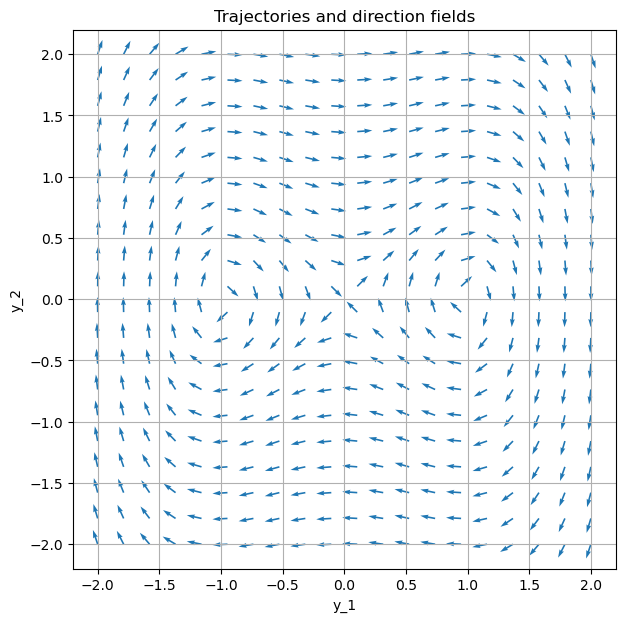

In [73]:
vField(-2, 2, -2, 2, dX_dt, Norm = True)

In [79]:
tmax = 20
t = np.linspace(0, tmax, 200)
# oscillation around right fixed point
#X, infodict = solveODE(dX_dt, [1.0, 0.1], t)

# oscillation around both fixed points
X, infodict = solveODE(dX_dt, [1.0, 2.5], t)


infodict['message']

'Integration successful.'

Text(0, 0.5, '$y$')

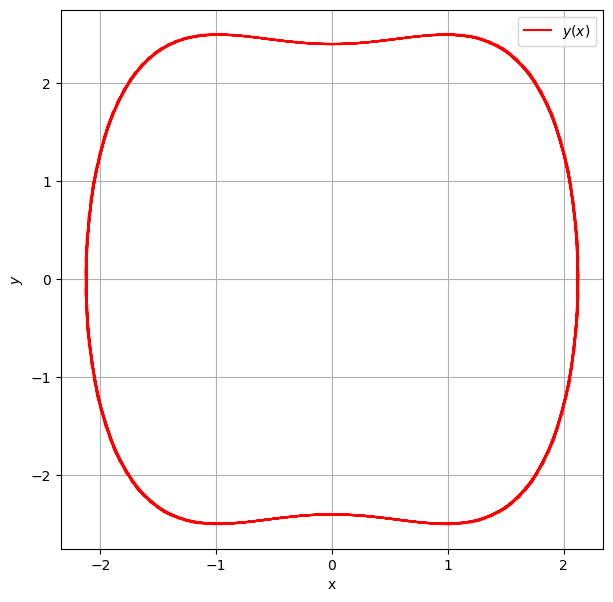

In [81]:
x, y = X.T

plt.plot(x, y, 'r-', label='$y(x)$')

plt.grid()
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('$y$')

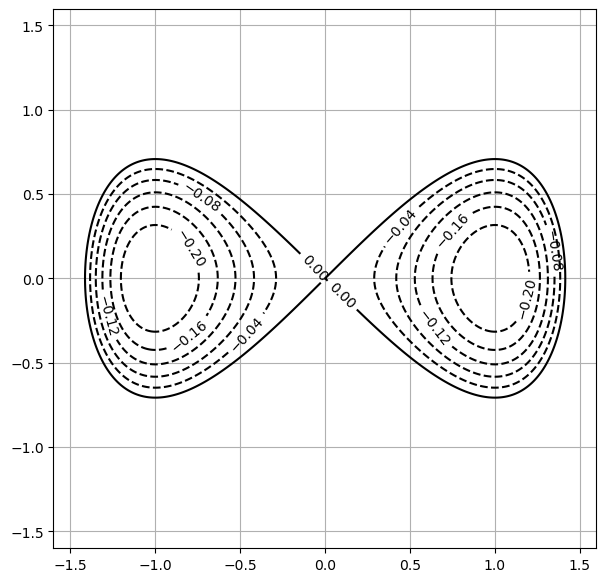

In [16]:
delta = 0.005
mx = 1.6
x = np.arange(-mx, mx, delta)
y = np.arange(-mx, mx, delta)
X, Y = np.meshgrid(x, y)

Z = 0.5*Y**2 - 0.5*X**2 + 1/4.*X**4

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, np.linspace(-0.2, 0, 6), colors='k')
# CS = ax.contour(X, Y, Z, [-0.01,0,0.01], colors='k')
ax.clabel(CS, inline=True)
ax.grid(True)

# Damped Case

## ODE

Now we add a damping term

$$
\begin{align*}
x' &= y \\
y' &= -by + x - x^3\\
\end{align*}
$$

TODO: Calc new position of fixed points

In [43]:
b = .5

In [45]:
def dX_dt(X, t=0):
    return np.array([X[1],
                     -b*X[1] + X[0] - X[0]**3])

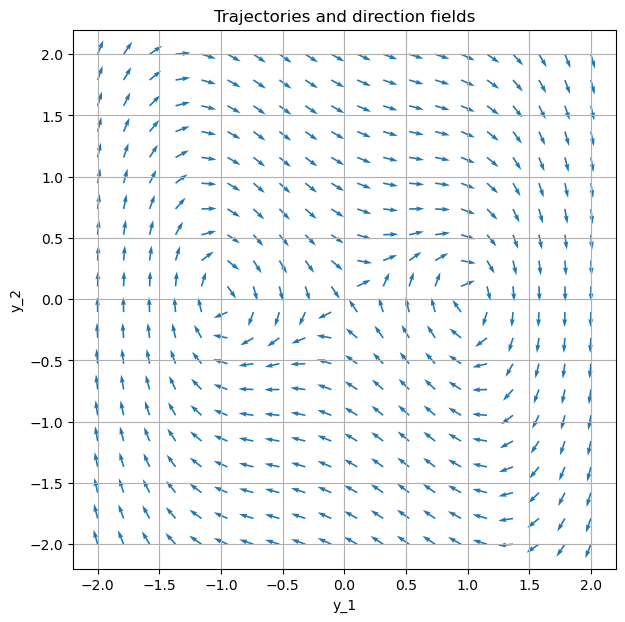

In [47]:
vField(-2, 2, -2, 2, dX_dt, Norm = True)

In [61]:
tmax = 20
t = np.linspace(0, tmax, 200)
X, infodict = solveODE(dX_dt, [1.0, 2.5], t)
infodict['message']

'Integration successful.'

Text(0, 0.5, '$y$')

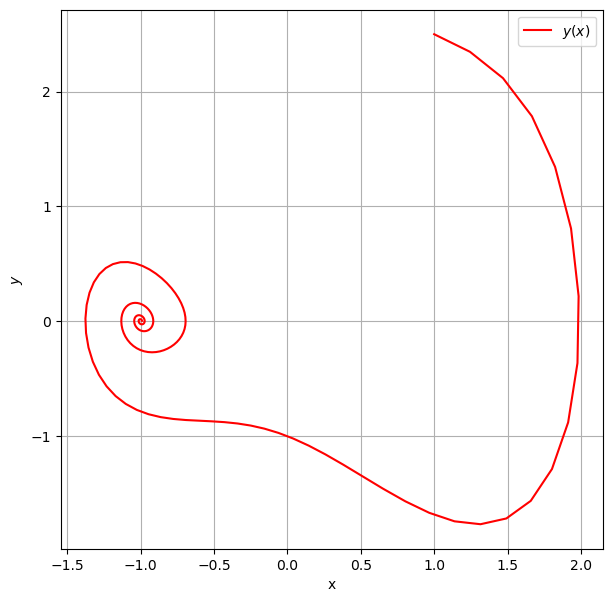

In [63]:
x, y = X.T

plt.plot(x, y, 'r-', label='$y(x)$')

plt.grid()
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('$y$')